# Documentation for Using the Traffic Model

This guide provides instructions on using the traffic model within a Jupyter notebook. The model is designed to simulate traffic dynamics based on predefined rules. Below are the steps to import and utilize the toy model as an example, which follows the basic rules outlined in the project brief.

## Importing the Model

To use the traffic model, start by importing the required class. In this example, we'll use the toy model provided. Ensure the model file (model_toy.py) is in the correct directory (model_class) or update the import statement with the correct path.

In [1]:
from model_class.model_toy_MN import TrafficSimulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random

In [5]:
def plot_road(roads, vmax = None, nt =None, L = None):
    roads_to_plot = np.array(roads).copy()
    empty_sites_ind = np.where(roads_to_plot == '-')
    roads_to_plot[empty_sites_ind] = -1
    roads_to_plot = roads_to_plot.astype(float)
    roads_to_plot[empty_sites_ind] = np.nan
    
    cmap = plt.get_cmap("jet_r", vmax+1)
    norm = mpl.colors.BoundaryNorm(np.arange(-0.5, vmax+1), cmap.N)
    img = plt.imshow(roads_to_plot, cmap=cmap, aspect=1, norm = norm)
    plt.yticks(fontsize = 28)
    plt.xticks(fontsize = 28)
    plt.ylabel(ylabel= "Time", fontsize = 28)
    plt.xlabel(f"Road ($\\longrightarrow$)", fontsize = 32)
    
    plt.style.use("default") # find more styles here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
    
    cb = plt.colorbar(orientation = "horizontal",  ticks=np.linspace(0,vmax, vmax+1))
    cb.ax.tick_params(labelsize=28)
    cb.set_label(label = f"Velocity", size = 28)
    plt.minorticks_on()
    # rows, cols = roads_to_plot.shape
    # for y in range(rows):
    #     for x in range(cols):
    #         val = roads_to_plot[y,x]
    #         if not np.isnan(val):
    #             val = int(val)
    #             plt.text(x, y, val, fontsize = 12, 
    #                     horizontalalignment = "center", 
    #                     verticalalignment = "center")

    return img

## Initializing the Model

After importing the class, initialize an instance of the TrafficSimulation class with the desired parameters, such as road_length, density, and car_slow_down_prob.

Execute the simulation using a loop to update the model over a specified number of time steps. In this example, we run the simulation for 10 time steps:

In [6]:
# Your simulation parameters
road_length = 30
density = 0.22
car_slow_down_prob = 0.1
number_of_simulation_steps = 9
road_speed_limit = 10

# Create an instance of TrafficSimulation
sim1 = TrafficSimulation(road_length, density, car_slow_down_prob, road_speed_limit)

# Run the simulation
for _ in range(number_of_simulation_steps):
    # sim1.print_step()   # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 
    print(sim1.get_heatmap())

['-', '-', '-', '-', '-', '-', 6, '-', '-', '-', '-', '-', '-', '-', 6, '-', '-', 2, '-', '-', '-', 3, '-', '-', '-', 3, '-', '-', '-', 3]
['-', '-', '-', 4, '-', '-', '-', '-', '-', '-', '-', '-', '-', 7, '-', 1, '-', '-', '-', '-', 3, '-', '-', '-', 3, '-', '-', '-', 3, '-']
['-', '-', 4, '-', '-', '-', '-', '-', 5, '-', '-', '-', '-', '-', 1, '-', '-', 2, '-', '-', '-', '-', '-', 3, '-', '-', '-', 3, '-', '-']
['-', 4, '-', '-', '-', '-', '-', 5, '-', '-', '-', '-', 4, '-', '-', '-', 2, '-', '-', '-', 3, '-', '-', '-', '-', '-', 3, '-', '-', '-']
[4, '-', '-', '-', '-', '-', 5, '-', '-', '-', '-', 4, '-', '-', '-', 3, '-', '-', '-', 3, '-', '-', '-', '-', 4, '-', '-', '-', '-', '-']
['-', '-', '-', '-', '-', 5, '-', '-', '-', '-', 4, '-', '-', 2, '-', '-', '-', '-', 3, '-', '-', '-', '-', 4, '-', '-', '-', '-', '-', 5]
['-', '-', '-', '-', 5, '-', '-', '-', '-', 4, '-', '-', 2, '-', '-', '-', 3, '-', '-', '-', '-', '-', 4, '-', '-', '-', '-', '-', 5, '-']
['-', '-', '-', 5, '-', '-'

# Accessing Simulation Results

To retrieve information from the simulation, you can access data such as the number of laps completed and a histogram of the number of cars at  different speeds. Additionally, you can print this information using the following code:

In [7]:
# Print simulation results
print(f'Number of cars seen at the boundary (over the whole simulation): {sim1.data_laps}')
print(f'Flow rate: {sim1.data_laps / number_of_simulation_steps} cars per iteration')
print(f'Dictionary of the number of cars at a speed:\n{sim1.data_speeds_histogram}')

Number of cars seen at the boundary (over the whole simulation): 7
Flow rate: 0.7777777777777778 cars per iteration
Dictionary of the number of cars at a speed:
{4: 3, 1: 1, 3: 1, 5: 1}


Note, that we can run data_speeds_histogram at each step, as the data changes per each time step, as an example:

In [8]:
# Run the simulation and print speed histograms at each step

dicts = []

for step in range(number_of_simulation_steps):
    sim1.print_step()  # Print the current state of the simulation
    sim1.update()      # Update the simulation for the next time step
    dicts.append(sim1.data_speeds_histogram)
    
    # Print speed histogram at each step
    print(f'Step {step + 1} - Dictionary of the number of cars at a speed:\n{sim1.data_speeds_histogram}')

- 4 - - - - - 4 - 1 - - - - 3 - - - - 4 - - - - - 5 - - - -
Step 1 - Dictionary of the number of cars at a speed:
{5: 3, 1: 1, 2: 1, 4: 1}
5 - - - - - 5 - 1 - - 2 - - - - - - 4 - - - - - 5 - - - - -
Step 2 - Dictionary of the number of cars at a speed:
{5: 3, 1: 1, 2: 1, 3: 1}
- - - - - 5 - 1 - - 2 - - - 3 - - - - - - - - 5 - - - - - 5
Step 3 - Dictionary of the number of cars at a speed:
{1: 1, 2: 1, 3: 1, 4: 2, 5: 1}
- - - - 5 - 1 - - 2 - - - 3 - - - - 4 - - - - - - - - 4 - -
Step 4 - Dictionary of the number of cars at a speed:
{1: 1, 2: 1, 3: 1, 4: 1, 5: 2}
- - 5 - - 1 - - 2 - - - 3 - - - - 4 - - - - - 5 - - - - - -
Step 5 - Dictionary of the number of cars at a speed:
{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1}
- - - 1 - - - 2 - - - 3 - - - - 4 - - - - - 5 - - - - - - 6
Step 6 - Dictionary of the number of cars at a speed:
{2: 1, 3: 2, 4: 2, 6: 1}
- - 3 - - 2 - - - - 3 - - - - 4 - - - - 4 - - - - - - - 6 -
Step 7 - Dictionary of the number of cars at a speed:
{2: 1, 3: 3, 4: 1, 5: 1}
- 3

In [9]:
dicts_df = pd.DataFrame.from_dict(dicts)
dicts_df.index.names = ['Iteration']
dicts_df = dicts_df.reindex(sorted(dicts_df.columns), axis=1)
dicts_df = dicts_df.fillna(0)
dicts_df = dicts_df.transpose()
dicts_df.index.names = ["Speed"]
dicts_df = dicts_df.astype(int)
dicts_df.columns = dicts_df.columns.astype(str)


# g = sns.FacetGrid(tips, col="time",  row="sex")
# g.map(sns.scatterplot, "total_bill", "tip")
display(dicts_df)
# fig, ax = plt.subplots(len(dicts_df.columns),1, figsize = (3, 27))
# dicts_df.plot.bar(subplots=True, figsize = (3, 27))        

Iteration,0,1,2,3,4,5,6,7,8
Speed,,,,,,,,,
1,1,1,1,1,1,0,0,0,0
2,1,1,1,1,1,1,1,1,1
3,0,1,1,1,1,2,3,2,2
4,1,0,2,1,1,2,1,2,2
5,3,3,1,2,1,0,1,1,1
6,0,0,0,0,1,1,0,0,0


This modification to the code prints the speed histogram at each time step, allowing you to observe the evolving distribution of car speeds throughout the simulation. Adjust the number_of_simulation_steps variable based on the actual number of steps used in your simulation. Feel free to further customize the output or include additional information as needed for your analysis.

I have built some test functions for the rule sets which can be called as: Note they will over ride some parameters are required.

In [10]:
road_length = 30
density = 0.22
car_slow_down_prob = 0.1
number_of_simulation_steps=10
sim1.test_simple_acceleration(0)    # set the model for the test, with the variable being pass is the car_slow_down_prob
# road_outputs = []
# Run the simulation
for _ in range(number_of_simulation_steps):
    sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 
    # road_outputs.append(sim1.get_heatmap())

0 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- 1 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - 2 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - 3 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - 4 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - 5 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - 5 - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - 5 - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 5 - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 5 - - - - - - - - - - - - - -


In [11]:
sim1.test_simple_acceleration(0.5)    # set the model for the test, with the variable being pass is the starting speed.
# Run the simulation
for _ in range(number_of_simulation_steps):
    sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 

0 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
0 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
0 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
0 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- 1 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - 2 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - 2 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - 2 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - 2 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - 2 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


In [12]:
sim1.test_simple_deceleration(0)  # Variable is the starting speed
for _ in range(number_of_simulation_steps):
    sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 

0 - - - 0 - - - - -
- 1 - - 0 - - - - -
- - - 2 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -


In [13]:
sim1.test_simple_deceleration(3)  # Variable is the starting speed
for _ in range(number_of_simulation_steps):
    sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 

3 - - - 0 - - - - -
- - - 3 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -
- - - 0 0 - - - - -


In [14]:
# we can also change the  stationary car position with the second argument
sim1.test_simple_deceleration(0, 8)  # Variable is the starting speed, stationary car position
for _ in range(number_of_simulation_steps):
    sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 

0 - - - - - - - 0 -
- 1 - - - - - - 0 -
- - - 2 - - - - 0 -
- - - - - - 3 - 0 -
- - - - - - - 1 0 -
- - - - - - - 0 0 -
- - - - - - - 0 0 -
- - - - - - - 0 0 -
- - - - - - - 0 0 -
- - - - - - - 0 0 -


#  Variable speed testing 
For this we need to import the updated model as before we import it:

In [15]:
from model_class.model_variable_speed_limits_MN import TrafficSimulation as VariableSpeedTrafficSimulation

In [16]:
road_speed_limit_list = ([18]*100) + ([9]*40 ) # You can create a list like this [speed_limit of road] * (how many blocks)
density = 15/len(road_speed_limit_list)
car_slow_down_prob = .1
# road_length = 70
number_of_simulation_steps = 100
sim2 = VariableSpeedTrafficSimulation(road_speed_limit_list, density, car_slow_down_prob)

# sim2.test_variable_speed_limits(6,4)
sim2.print_speed_limits()
var_sl_road_outputs = []
# limit_list = sim2.get_road_header()
for _ in range(number_of_simulation_steps):
    # sim2.print_step()
    sim2.update()
    var_sl_road_outputs.append(sim2.get_heatmap())

18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9


Number of cars seen at the boundary (over the whole simulation): 73
Flow rate: 0.73 cars per iteration
18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9


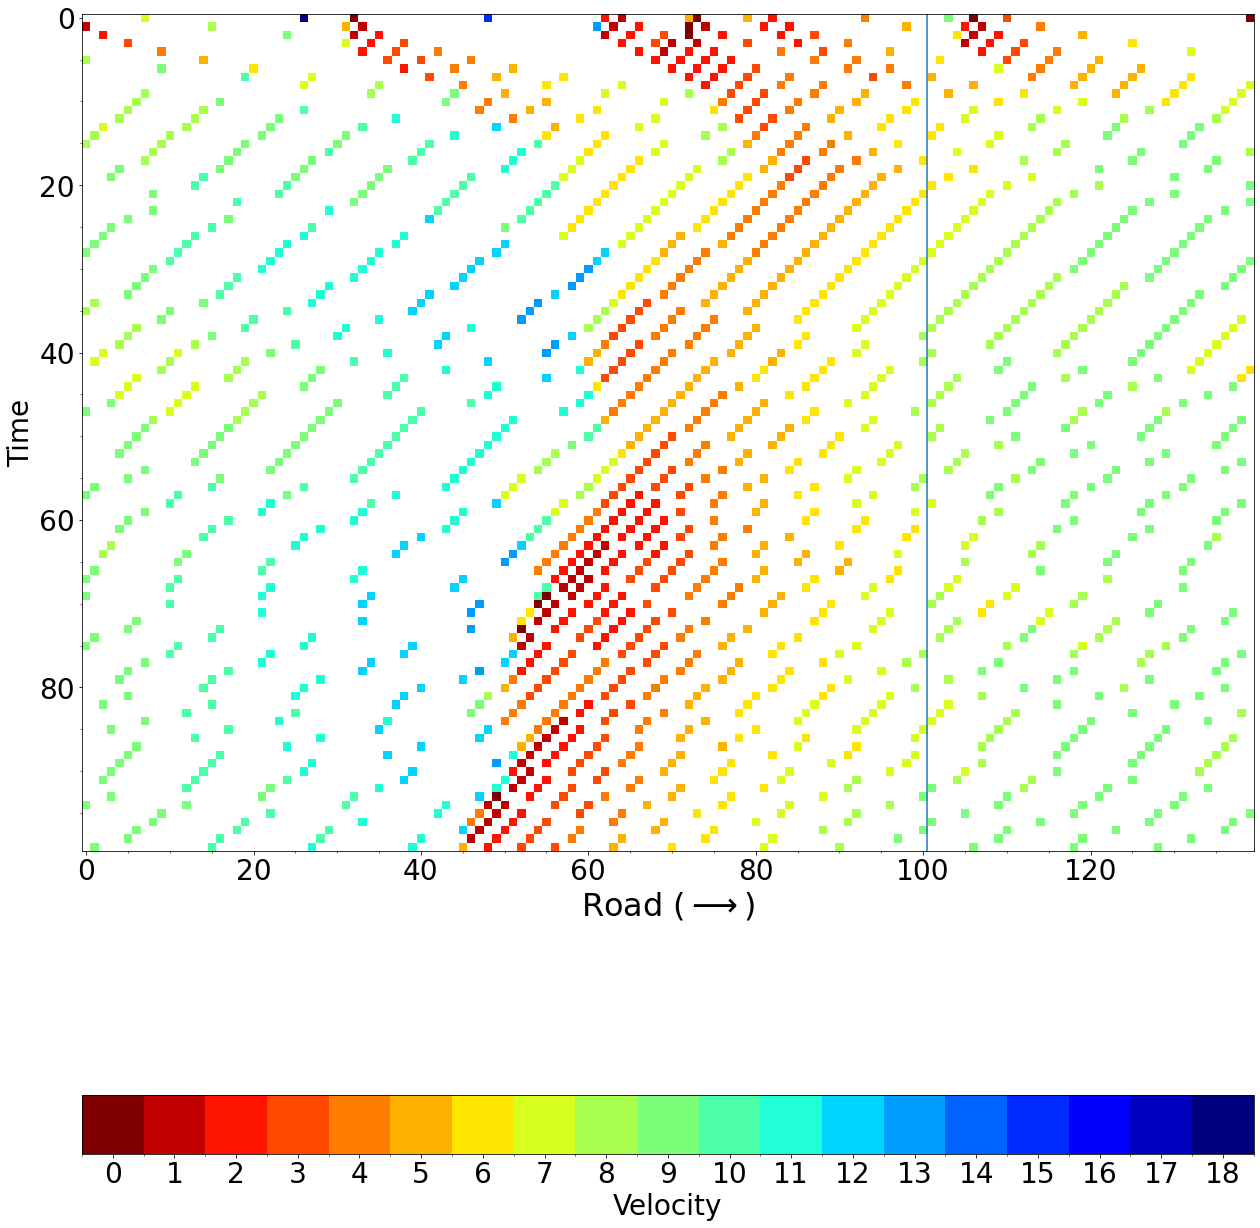

In [17]:
fig, ax = plt.subplots(figsize = (21,30))

plt.axvline(100.5)
plot_road(var_sl_road_outputs, vmax = max(road_speed_limit_list), nt = number_of_simulation_steps, L = len(road_speed_limit_list))

print(f'Number of cars seen at the boundary (over the whole simulation): {sim2.data_laps}')
print(f'Flow rate: {sim2.data_laps / number_of_simulation_steps} cars per iteration')
sim2.print_speed_limits()

Number of cars seen at the boundary (over the whole simulation): 23
Flow rate: 0.575 cars per iteration


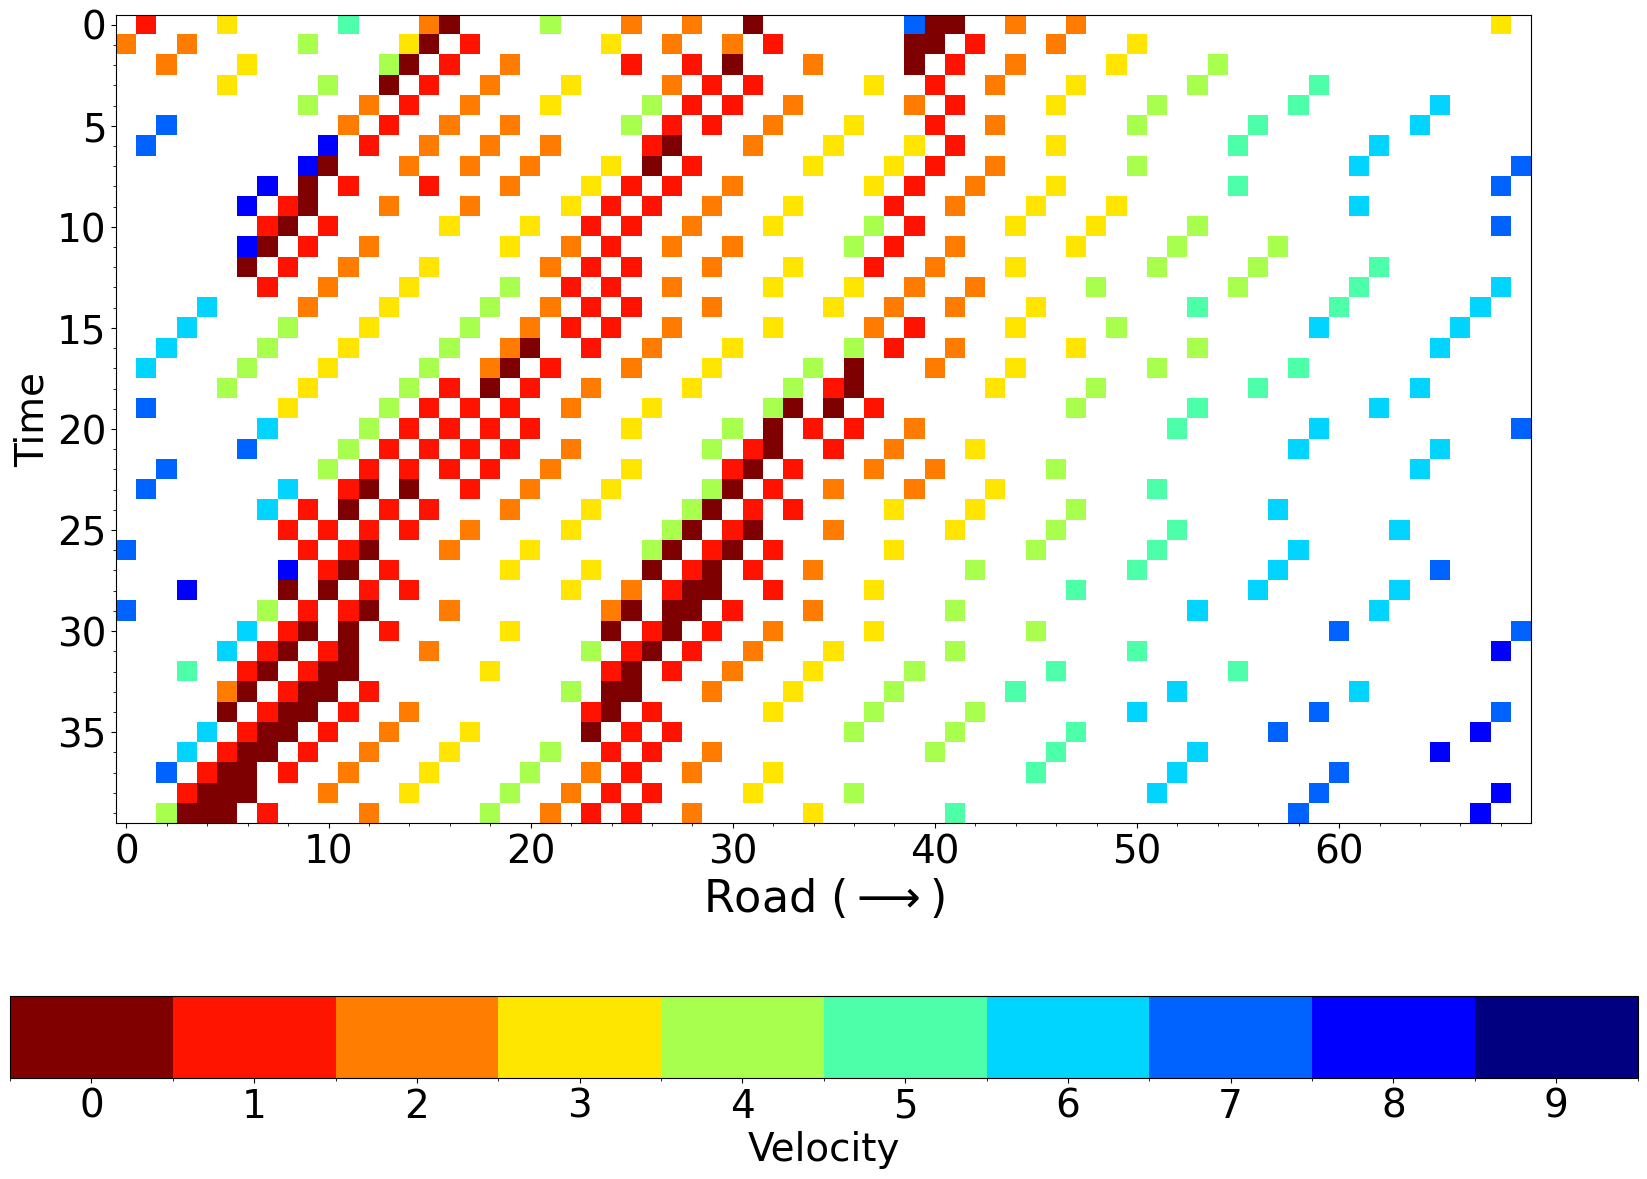

In [18]:
road_length = 70
density = 15/road_length
car_slow_down_prob = 0.1
number_of_simulation_steps= 40
road_speed_limit = 9

sim1 = TrafficSimulation(road_length, density, car_slow_down_prob, road_speed_limit)

road_outputs = []
# Run the simulation
for _ in range(number_of_simulation_steps):
    # sim1.print_step()    # Here we print the state of the model, we can remove. 
    sim1.update()        # Steps the simulation 
    road_outputs.append(sim1.get_heatmap())

fig, ax = plt.subplots(figsize = (21,15))

plot_road(road_outputs, vmax = road_speed_limit, nt = number_of_simulation_steps, L = road_length)

print(f'Number of cars seen at the boundary (over the whole simulation): {sim1.data_laps}')
print(f'Flow rate: {sim1.data_laps / number_of_simulation_steps} cars per iteration')

In [19]:
road_lengths = [14, 35, 70, 140]
densities = np.linspace(0, 1, 500)

# road_length = 70
# density = 15/road_length
car_slow_down_prob = 0.1
number_of_simulation_steps= 1000
road_speed_limit = 9

flow_rates_road_lengths = []
for road_length in road_lengths:
    flow_rates = []
    for density in densities:
        sim1 = TrafficSimulation(road_length, density, car_slow_down_prob, road_speed_limit)
        # Run the simulation
        for _ in range(number_of_simulation_steps):
            # sim1.print_step()    # Here we print the state of the model, we can remove. 
            sim1.update()        # Steps the simulation
        flow_rate = sim1.data_laps/number_of_simulation_steps
        flow_rates.append(flow_rate)
    flow_rates_road_lengths.append(flow_rates)
    
    

KeyboardInterrupt: 

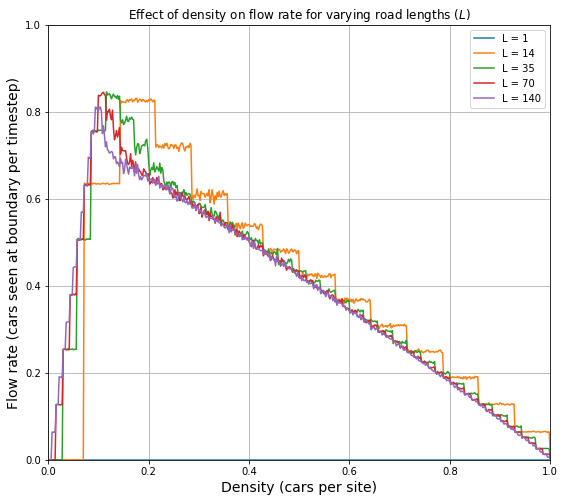

In [ ]:
fig, ax = plt.subplots(figsize = (9,8))
for i in range(len(road_lengths)):
    plt.plot(densities, flow_rates_road_lengths[i], label = f"L = {road_lengths[i]}")
plt.legend()
plt.title(f"Effect of density on flow rate for varying road lengths ($L$)")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("Density (cars per site)", fontsize = 14)
plt.ylabel("Flow rate (cars seen at boundary per timestep)", fontsize = 14)
plt.grid()

In [ ]:
nts = [10, 50, 75, 100, 1000, 10000]
# nts = [50, 100]
densities = np.linspace(0, 1, 100)

road_length = 70
# density = 15/road_length
car_slow_down_prob = 0.1
# number_of_simulation_steps= 10000
road_speed_limit = 9

flow_rates_timesteps = []
for number_of_simulation_steps in nts:
    flow_rates = []
    for density in densities:
        sim1 = TrafficSimulation(road_length, density, car_slow_down_prob, road_speed_limit)
        # Run the simulation
        for _ in range(number_of_simulation_steps):
            # sim1.print_step()    # Here we print the state of the model, we can remove. 
            sim1.update()        # Steps the simulation
        flow_rate = sim1.data_laps/number_of_simulation_steps
        flow_rates.append(flow_rate)
    flow_rates_timesteps.append(flow_rates)
    


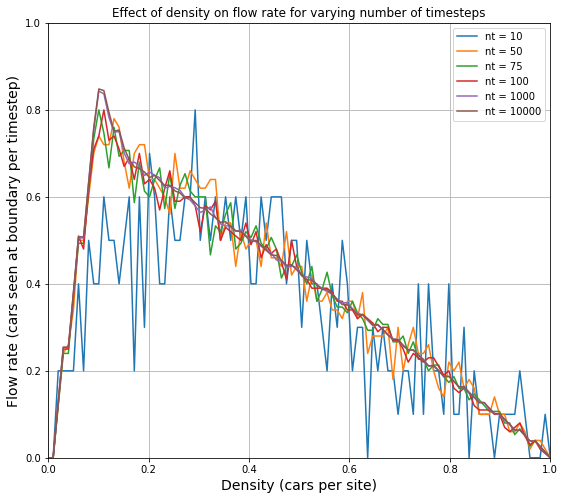

In [ ]:
fig, ax = plt.subplots(figsize = (9,8))
for i in range(len(nts)):
    plt.plot(densities, flow_rates_timesteps[i], label = f"nt = {nts[i]}")
plt.legend()
plt.title(f"Effect of density on flow rate for varying number of timesteps")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("Density (cars per site)", fontsize = 14)
plt.ylabel("Flow rate (cars seen at boundary per timestep)", fontsize = 14)
plt.grid()

In [ ]:
print(f'Number of cars seen at the boundary (over the whole simulation): {sim1.data_laps}')
print(f'Flow rate: {sim1.data_laps / number_of_simulation_steps} cars per iteration')

In [ ]:
speed_limits = [9, 18, 27]
densities = np.linspace(0, 1, 100)

road_length = 70
# density = 15/road_length
car_slow_down_prob = 0.1
number_of_simulation_steps= 1000
# road_speed_limit = 9

flow_rates_speeds = []
for road_speed_limits in speed_limits:
    flow_rates = []
    for density in densities:
        sim1 = TrafficSimulation(road_length, density, car_slow_down_prob, road_speed_limit)
        # Run the simulation
        for _ in range(number_of_simulation_steps):
            # sim1.print_step()    # Here we print the state of the model, we can remove. 
            sim1.update()        # Steps the simulation
        flow_rate = sim1.data_laps/number_of_simulation_steps
        flow_rates.append(flow_rate)
    flow_rates_speeds.append(flow_rates)

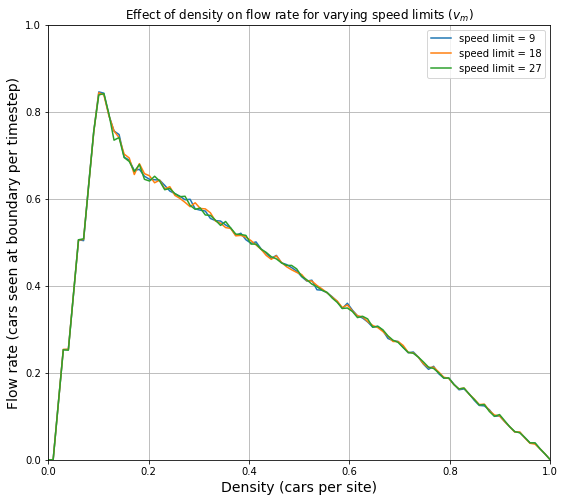

In [ ]:
max = "max"
fig, ax = plt.subplots(figsize = (9,8))
for i in range(len(speed_limits)):
    plt.plot(densities, flow_rates_speeds[i], label = f"speed limit = {speed_limits[i]}")
plt.legend()
plt.title(fr"Effect of density on flow rate for varying speed limits ($v_m$)")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("Density (cars per site)", fontsize = 14)
plt.ylabel("Flow rate (cars seen at boundary per timestep)", fontsize = 14)
plt.grid()

In [ ]:
probabilities = [0, 0.2, 0.4, 0.6, 0.8]
densities = np.linspace(0, 1, 500)

road_length = 70
# density = 15/road_length
# car_slow_down_prob = 0.1
number_of_simulation_steps= 1000
road_speed_limit = 9

flow_rates_probs = []
for prob in probabilities:
    flow_rates = []
    for density in densities:
        sim1 = TrafficSimulation(road_length, density, prob, road_speed_limit)
        # Run the simulation
        for _ in range(number_of_simulation_steps):
            # sim1.print_step()    # Here we print the state of the model, we can remove. 
            sim1.update()        # Steps the simulation
        flow_rate = sim1.data_laps/number_of_simulation_steps
        flow_rates.append(flow_rate)
    flow_rates_probs.append(flow_rates)

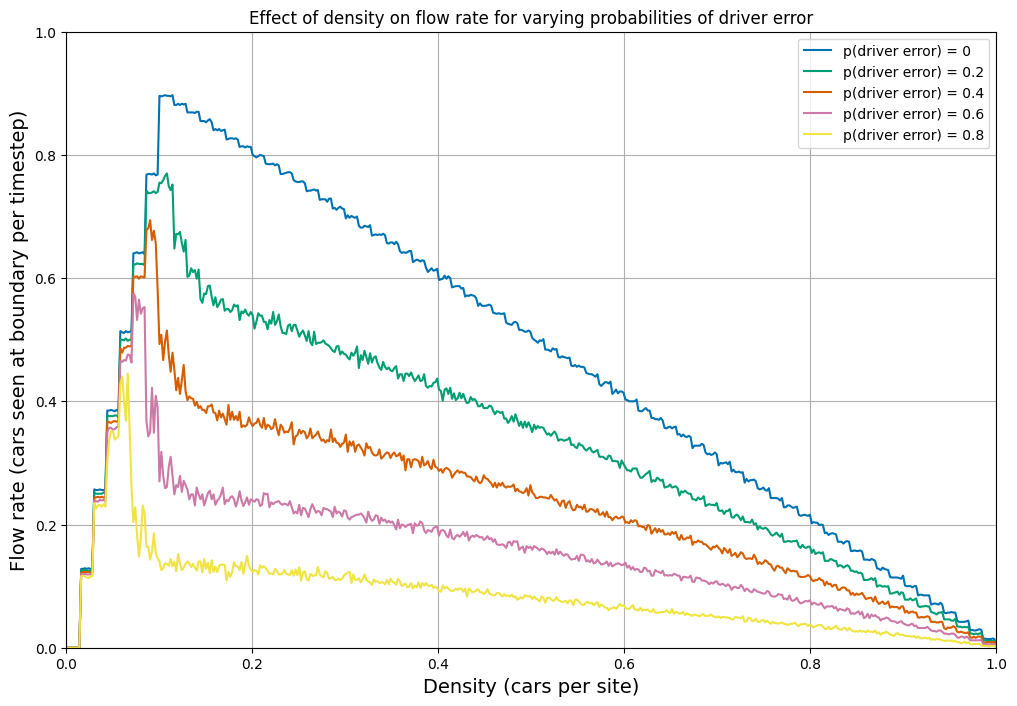

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
plt.style.use("seaborn-v0_8-colorblind")
for i in range(len(probabilities)):
    plt.plot(densities, flow_rates_probs[i], label = f"p(driver error) = {probabilities[i]}")
plt.legend()
plt.title(f"Effect of density on flow rate for varying probabilities of driver error")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("Density (cars per site)", fontsize = 14)
plt.ylabel("Flow rate (cars seen at boundary per timestep)", fontsize = 14)
plt.grid()

In [2]:
from model_class.model_simply_traffic_lights_MN import TrafficSimulation as TrafficLightSimulation

In [141]:
random.seed(123)
limit_boundaries = [80]
region_lengths = [80, 60]
region_speed_limits = [18, 9]
light_positions = [120]
nt = 100
car_slow_down_prob = 0.2
road_speed_limit_list = ([region_speed_limits[0]]*region_lengths[0]) + ([region_speed_limits[1]]*region_lengths[1]) # + ([18]*40) # You can create a list like this [speed_limit of road] * (how many blocks)
density = 15/len(road_speed_limit_list)

# # this is (traffic light position, green time, red time, starting time): reduce diff between green and red time to increase red light signals
traffic_light_list = [(light_positions[0],15,2,0)] 


# sim3 = TrafficLightSimulation(road_speed_limit_list, traffic_light_list, density, car_slow_down_prob) 
# road_outputs = []
# traffic_light_outputs = []

# # sim3.print_speed_limits()
# for _ in range(nt):
#     # sim3.print_traffic_lights()
#     road_outputs.append(sim3.get_heatmap())
#     traffic_light_outputs.append(sim3.get_traffic_lights())
#     # sim3.print_step() 
#     sim3.update()

In [142]:
def simulate_traffic_lights(region_lengths, region_speed_limits, density, nt, car_slow_down_prob, traffic_light_list):
    road_speed_limit_list = []
    for i in range(len(region_lengths)):
        road_speed_limit_list = road_speed_limit_list + [region_speed_limits[i]]*region_lengths[i]
    # road_speed_limit_list = sum(([region_speed_limits[i]]*region_lengths[i]) for i in range(len(region_lengths)))
    # print(road_speed_limit_list)
    
    sim3 = TrafficLightSimulation(road_speed_limit_list, traffic_light_list, density, car_slow_down_prob) 
    road_outputs = []
    traffic_light_outputs = []

    # sim3.print_speed_limits()
    for _ in range(nt):
        # sim3.print_traffic_lights()
        # sim3.print_step() 
        road_outputs.append(sim3.get_heatmap())
        traffic_light_outputs.append(sim3.get_traffic_lights())
        sim3.update() 
        
    flow_rate = sim3.data_laps/nt
    
    return road_outputs, traffic_light_outputs, flow_rate

In [143]:
simulation1 = simulate_traffic_lights(region_lengths, region_speed_limits, density, nt, car_slow_down_prob, traffic_light_list)

In [146]:
def plot_road_with_lights(roads, traffic_light_roads, light_positions, limit_boundaries, vmax = None, nt =None, L = None, traffic_light_list = None):
    roads_to_plot = np.array(roads).copy()
    empty_sites_ind = np.where(roads_to_plot == '-')
    roads_to_plot[empty_sites_ind] = -1
    roads_to_plot = roads_to_plot.astype(float)
    roads_to_plot[empty_sites_ind] = np.nan
    
    lights_to_plot = np.array(traffic_light_roads).copy()
    empty_sites_ind = np.where(lights_to_plot == '-')
    lights_to_plot[empty_sites_ind] = 0
    empty_sites_ind_g = np.where(lights_to_plot == 'g')
    lights_to_plot[empty_sites_ind_g] = 0
    empty_sites_ind_r = np.where(lights_to_plot == 'r')
    lights_to_plot[empty_sites_ind_r] = 1
    lights_to_plot = lights_to_plot.astype(float)
    lights_to_plot[empty_sites_ind_g] = np.nan
    lights_to_plot[empty_sites_ind] = np.nan
    
    # Traffic light plot
    cmap = plt.get_cmap("binary", 3)
    norm = mpl.colors.BoundaryNorm([-0.5,6.5], cmap.N)
    img = plt.imshow(lights_to_plot[:nt+1], cmap=cmap, norm=norm)
    
    # cb = plt.colorbar(orientation = "horizontal")
    # cb.ax.tick_params(labelsize=28)
    # cb.set_label(label = f"Velocity", size = 28)
    # plt.minorticks_on()
    
    # Vehicles plot
    cmap = plt.get_cmap("jet_r", vmax+1)
    norm = mpl.colors.BoundaryNorm(np.arange(-0.5, vmax+1), cmap.N)
    img2 = plt.imshow(roads_to_plot[:nt+1], cmap=cmap, aspect=1, norm = norm)
    plt.yticks(fontsize = 28)
    plt.xticks(fontsize = 28)
    plt.ylabel(ylabel= "Time", fontsize = 28)
    plt.xlabel(f"Road ($\\longrightarrow$)", fontsize = 32)
    
    plt.style.use("default") # find more styles here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
    
    cb = plt.colorbar(orientation = "horizontal",  ticks=np.linspace(0,vmax, vmax+1), pad = 0.1)
    cb.ax.tick_params(labelsize=28)
    cb.set_label(label = f"Velocity", size = 28)
    plt.minorticks_on()
    
    if light_positions != None:
        for position in light_positions:
            plt.axvline(position+0.5, color = "k", linewidth = 0.75)
            plt.axvline(position-0.5, color = "k", linewidth = 0.75)
    
    if limit_boundaries != None:
        for boundary in limit_boundaries:
            plt.axvline(boundary+0.5, color = "k", linewidth = 1.25, linestyle = "dotted")

flow rate: 0.43


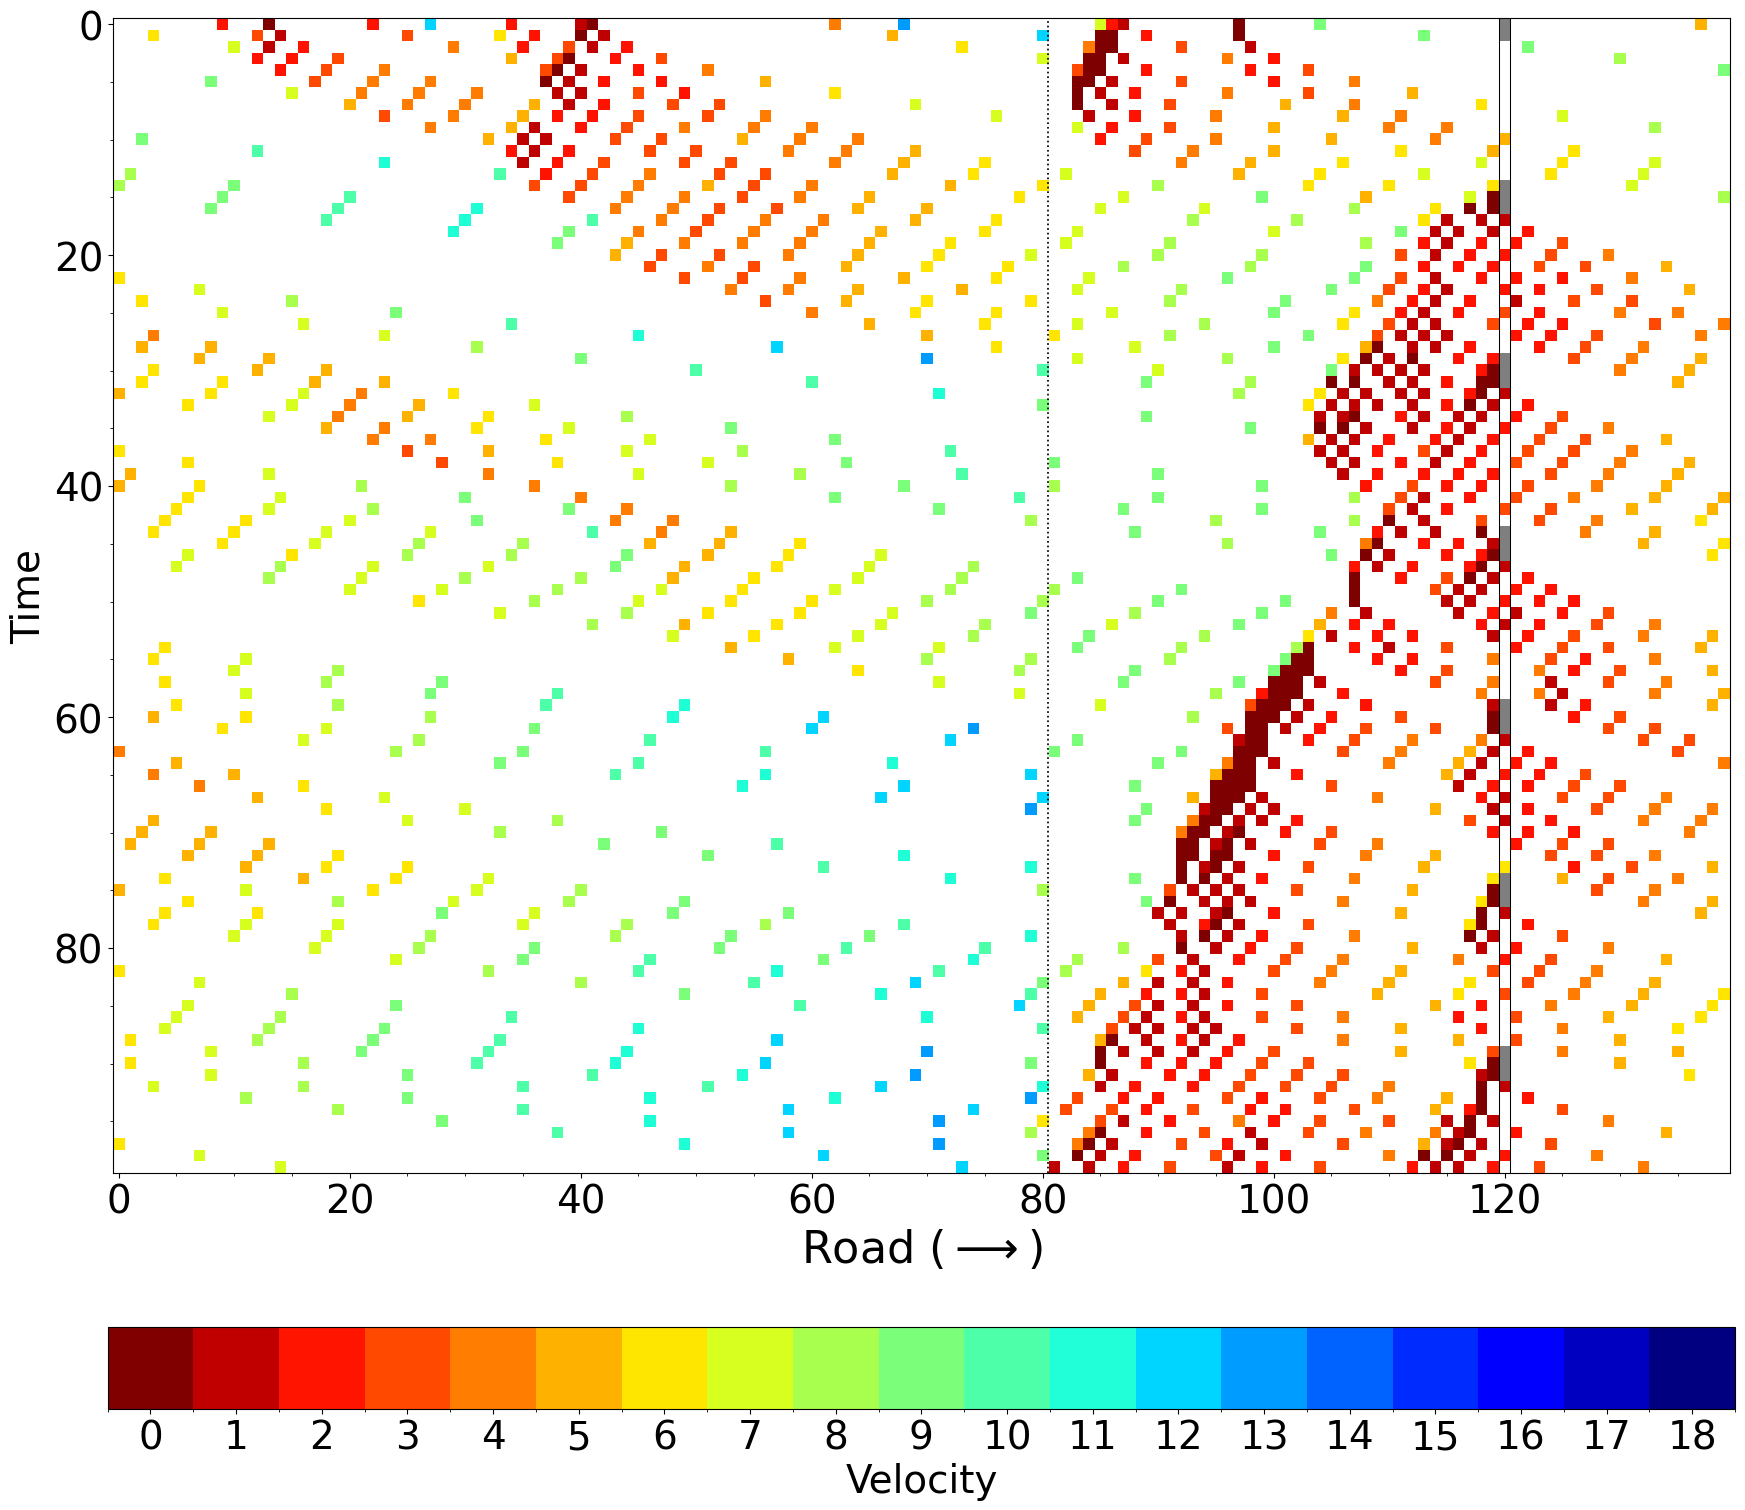

In [147]:
fig, ax = plt.subplots(figsize = (21,20))
print("flow rate:",simulation1[2])
plot_road_with_lights(roads = simulation1[0], traffic_light_roads = simulation1[1], 
                      light_positions = light_positions, limit_boundaries = limit_boundaries, 
                      vmax = max(road_speed_limit_list), nt = nt, L = len(road_speed_limit_list))


# TESTING REAL WORLD DATA

In [184]:
random.seed(123) # DO NOT TOUCH THIS
L = 240
density = 0.5
nt = 250

# limit_boundaries = [240] # speed limits
region_lengths = [240]
region_speed_limits = [14]
# light_positions = [70, 114]
light_positions = [70, 150]
# nt = 100
car_slow_down_prob = 0.127
# road_speed_limit_list = ([region_speed_limits[0]]*region_lengths[0]) + ([region_speed_limits[1]]*region_lengths[1]) # + ([18]*40) # You can create a list like this [speed_limit of road] * (how many blocks)
# density = 15/len(road_speed_limit_list)

# # this is (traffic light position, green time, red time, starting time): reduce diff between green and red time to increase red light signals
traffic_light_list = [(light_positions[0],28,2,0), (light_positions[1], 24,2,0)]

In [185]:
simulation = simulate_traffic_lights(region_lengths, region_speed_limits, 
                                     density, nt, car_slow_down_prob, 
                                     traffic_light_list)
print(simulation[2])

0.416


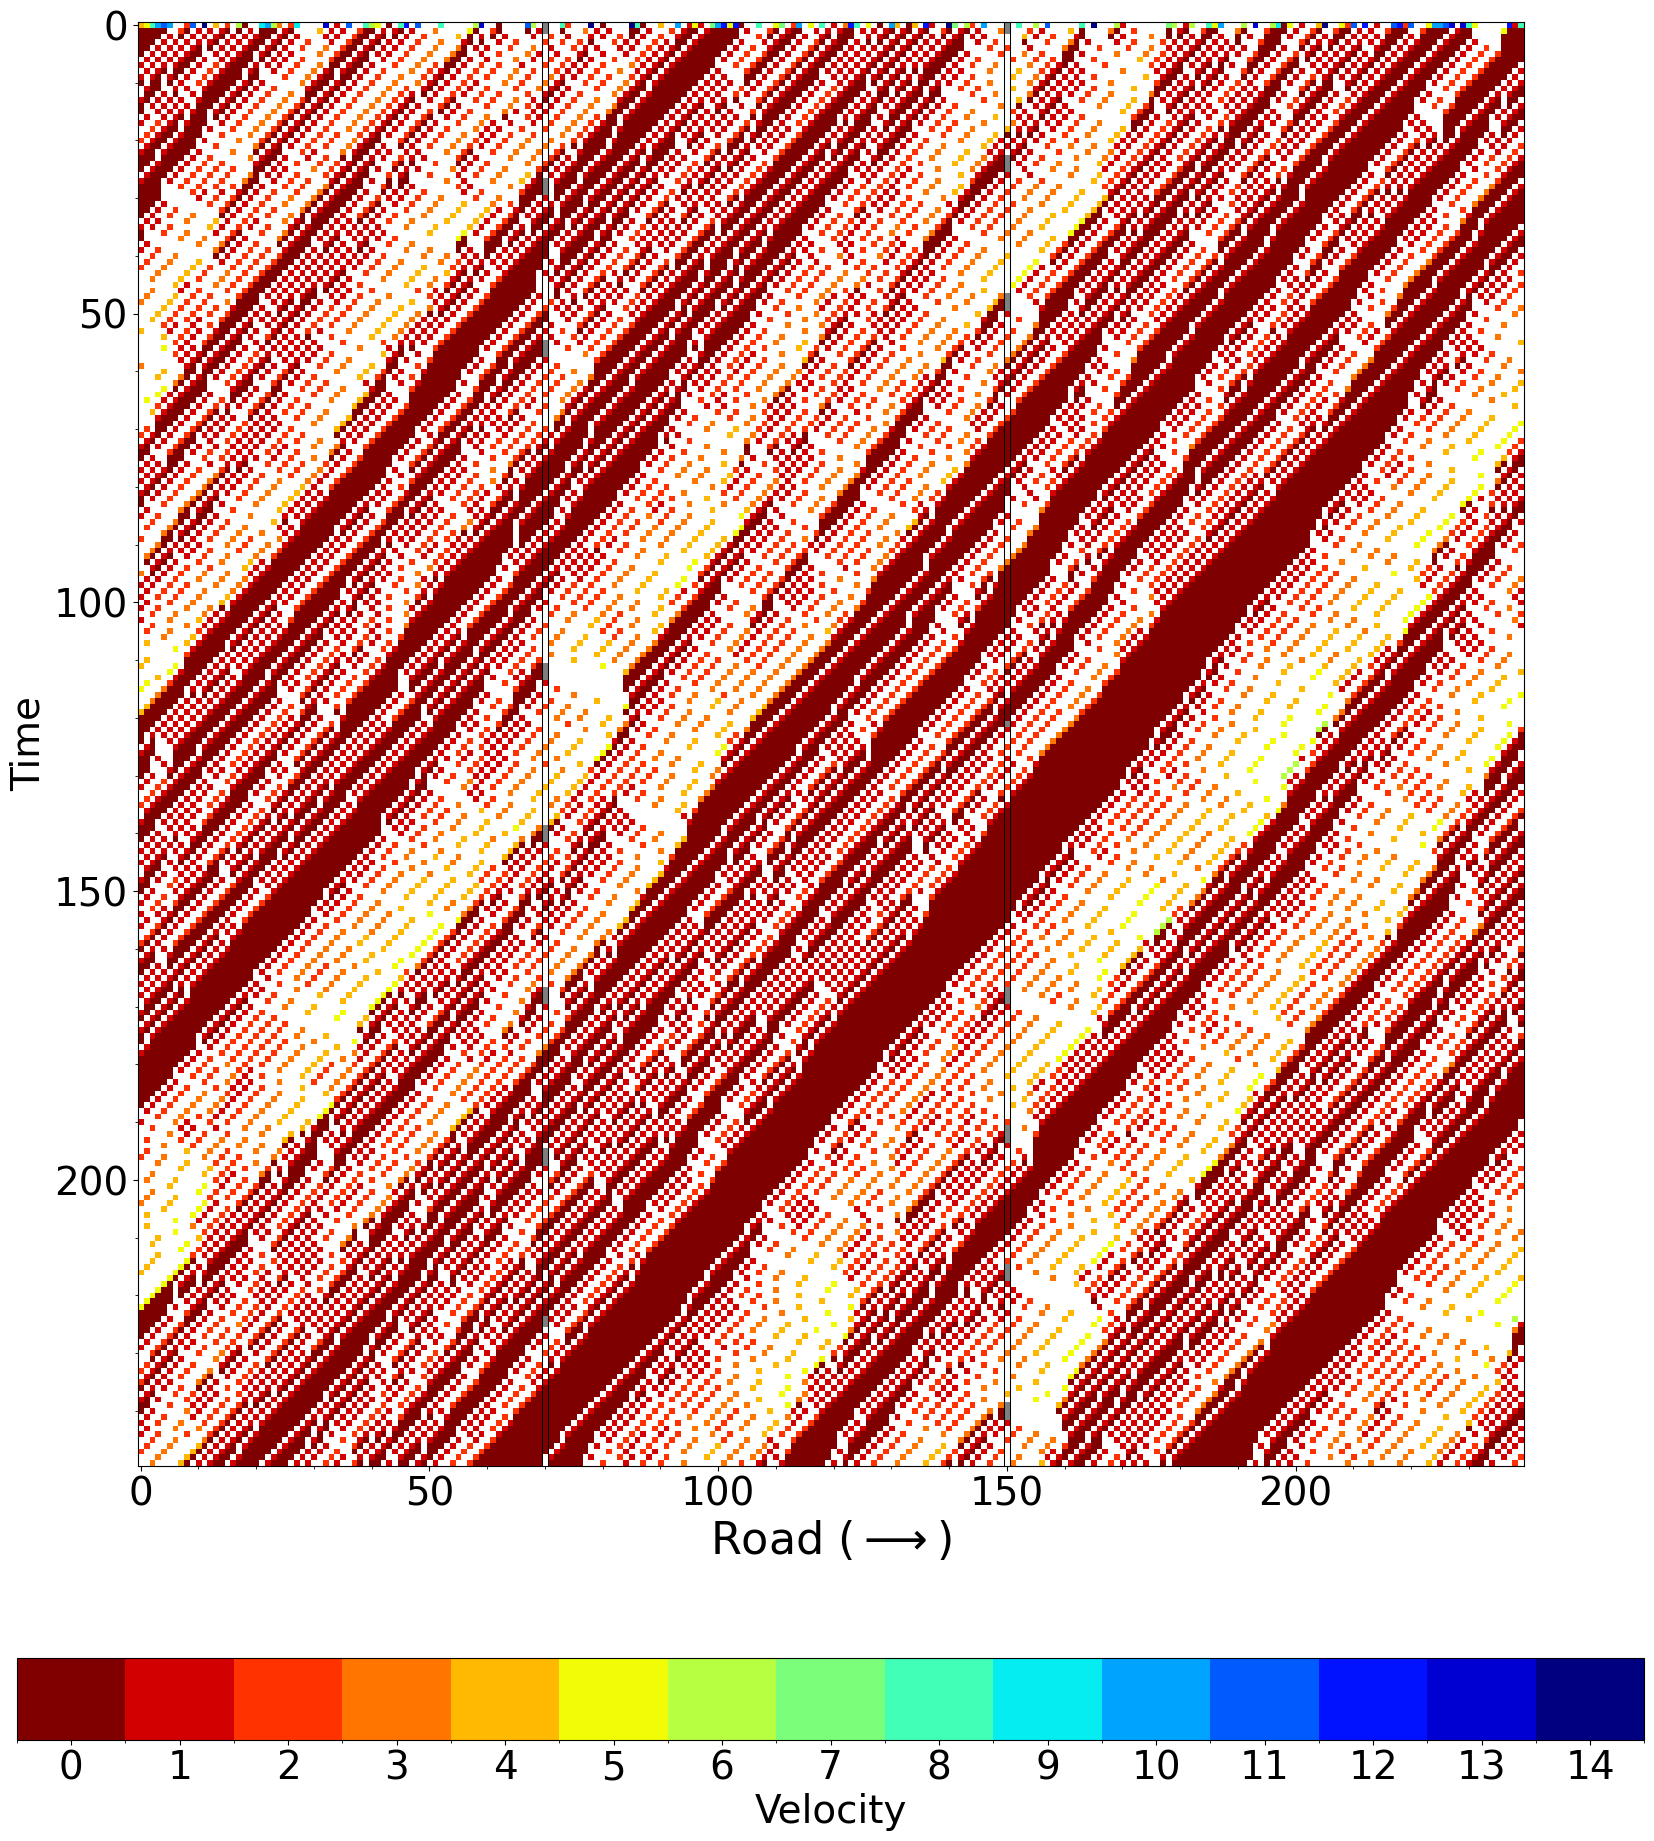

In [186]:
fig, ax = plt.subplots(figsize = (21,25))
plot_road_with_lights(roads = simulation[0], traffic_light_roads=simulation[1], nt =nt, light_positions = light_positions, limit_boundaries = None, vmax = region_speed_limits[0], L = L, traffic_light_list=traffic_light_list)